In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
# function to clean column names
def clear_cols(s):
    return s.strip().replace(" ","_")

# load data
path = '../Healthcare Provider Fraud Detection Analysis/Train-1542865627584.csv'
df = pd.read_csv(path).rename(columns=clear_cols)


In [3]:
print(f"Shape of the file: {df.shape}")
df.head()

Shape of the file: (5410, 2)


,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


In [4]:
print(f"duplicates -> {df.duplicated().sum()}\n")
print(f"null values: \n{df.isnull().sum()}")

duplicates -> 0

null values: 
Provider          0
PotentialFraud    0
dtype: int64


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5410 entries, 0 to 5409
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Provider        5410 non-null   object
 1   PotentialFraud  5410 non-null   object
dtypes: object(2)
memory usage: 84.7+ KB


In [6]:
df['PotentialFraud'].value_counts()

PotentialFraud
No     4904
Yes     506
Name: count, dtype: int64

In [7]:
# presentage of missing values
df.isna().sum()/len(df) *100

Provider          0.0
PotentialFraud    0.0
dtype: float64

In [8]:
df['Provider'].nunique()

5410

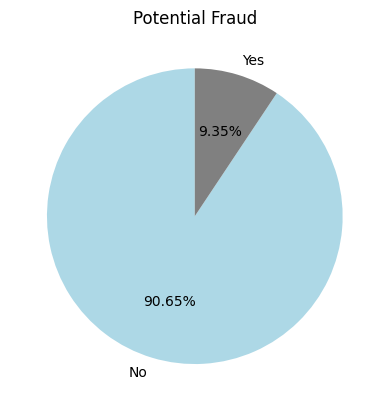

In [9]:
plt.pie(df['PotentialFraud'].value_counts(), labels=['No','Yes'], autopct='%1.2f%%',startangle=90,colors=['lightblue','gray'])
plt.title('Potential Fraud')
plt.show()

/var/folders/dq/lfhw90y53plczdyg_s9ch5q40000gn/T/ipykernel_80569/826848981.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=fraud_data, x='PotentialFraud', y='Count', palette='viridis')


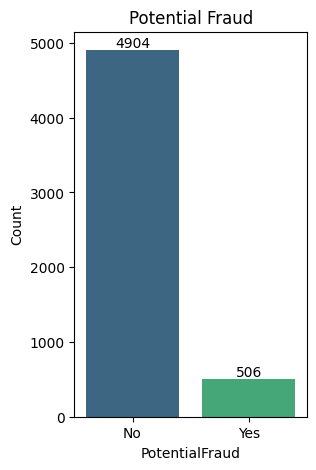

In [10]:
# plot the difference between the fraud and non-fraud providers
fraud_counts = df['PotentialFraud'].value_counts()
fraud_data = pd.DataFrame({'PotentialFraud': fraud_counts.index, 'Count': fraud_counts.values})

# Create the bar plot
plt.figure(figsize=(3, 5))
ax = sns.barplot(data=fraud_data, x='PotentialFraud', y='Count', palette='viridis')

# Add labels to bars
for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.title('Potential Fraud')
plt.show()

In [11]:
df.loc[df['Provider'] == 'PRV51001']

,Provider,PotentialFraud
0,PRV51001,No


In [12]:
df.value_counts()

Provider  PotentialFraud
PRV51001  No                1
PRV55516  No                1
PRV55527  No                1
PRV55525  No                1
PRV55523  No                1
                           ..
PRV53246  No                1
PRV53245  Yes               1
PRV53244  No                1
PRV53243  No                1
PRV57763  No                1
Name: count, Length: 5410, dtype: int64

### We have about 90% not predicted as fraud providers,
### And 10% of predicted as Frauds in the dataset